# Equation de  van der Waals d'un gaz réel

## Equation de van der Waals et isothermes

L'équation d'un gaz selon Van der Waals s'écrit:
\begin{align*}
p &= \frac{RT}{V_{\text{m}}-b} - \frac{a}{V_{\text{m}}^2}
\end{align*}

In [1]:
%matplotlib inline
import numpy
from matplotlib import pylab as plt
from matplotlib import cm, colors

Les coefficients $a$ et $b$ sont appelés **coefficients de van der Waals**. Ils sont différents pour chaque gaz mais indépendants de la température.

On définit ci-dessous les coefficients a et b pour différents gaz:

In [2]:
class Gas:
    def __init__(self, name, a, b, pc, Vc, Tc):
        self.name = name
        self.a = a # in l^2 atm mol^{-2}
        self.b = b # in l mol^-1
        self.pc = pc # in atm
        self.Vc = Vc # in l mol^-1
        self.Tc = Tc # in K
    def pressure(self, Vm, T):
        part1 = 0.08205 * T / (Vm - self.b)
        part2 = self.a / (Vm * Vm)
        return part1 - part2
    def criticalValuesFromVDW(self):
        Vc = 3 * self.b
        pc = self.a / (27 * self.b * self.b)
        Tc = 8 * self.a / (27 * 0.08205 * self.b)
        return (pc, Vc, Tc)
listOfGas = {}
listOfGas["Ar"] = Gas("Ar", 1.337, 3.20e-2, 48.0, 75.3e-3, 150.7)
listOfGas["C2H4"] = Gas("C$_2$H$_4$", 4.552, 5.82e-2, 50.50, 124e-3, 283.1)
listOfGas["C2H6"] = Gas("C$_2$H$_6$", 5.507, 6.51e-2, 48.20, 148e-3, 305.4)
listOfGas["C4H10"] = Gas("C$_4$H$_{10}$", 14.47, 11.42e-2, 37.46, 258e-3, 425.16) # from doi: 10.1021/ed063p466
listOfGas["C6H6"] = Gas("C$_6$H$_6$", 18.57, 11.93e-2, 48.6, 260e-3, 562.7)
listOfGas["CH4"] = Gas("CH$_4$", 2.273, 4.31e-2, 45.6, 98.7e-3, 190.6)
listOfGas["Cl2"] = Gas("Cl$_2$", 6.260, 5.42e-2, 76.1, 124e-3, 417.2)
#listOfGas["CO"] = Gas("CO", 1.453, 3.95e-2, None, None, None)
listOfGas["CO2"] = Gas("CO$_2$", 3.610, 4.29e-2, 72.9, 94.0e-3, 304.2)
listOfGas["H2"] = Gas("H$_2$", 0.2420, 2.65e-2, 12.8, 34.99e-3, 33.23)
listOfGas["H2O"] = Gas("H$_2$O", 5.464, 3.05e-2, 218.3, 55.3e-3, 647.4)
#listOfGas["H2S"] = Gas("H$_2$S", 4.484, 4.34e-2, None, None, None)
listOfGas["He"] = Gas("He", 0.0341, 2.38e-2, 2.26, 57.8e-3, 5.2)
listOfGas["Kr"] = Gas("Kr", 5.125, 1.06e-2, 54.27, 92.24e-3, 209.39)
listOfGas["N2"] = Gas("N$_2$", 1.352, 3.87e-2, 33.54, 90.10e-3, 126.3)
listOfGas["Ne"] = Gas("Ne", 0.205, 1.67e-2, 26.86, 41.74e-3, 44.44)
listOfGas["NH3"] = Gas("NH$_3$", 4.169, 3.71e-2, 111.3, 72.5e-3, 405.5)
listOfGas["O2"] = Gas("O$_2$", 1.364, 3.19e-2, 50.14, 78.0e-3, 154.8)
#listOfGas["SO2"] = Gas("SO$_2$", 6.775, 5.68e-2, None, None, None)
listOfGas["Xe"] = Gas("Xe", 4.137, 5.16e-2, 58.0, 118.8e-3, 289.75)


A partir de cette équation, on peut tracer différentes isothermes.
Ci-dessous on choisi le gaz et les différentes températures pour lesquelles on veut tracer un isotherme.

In [15]:
temperatures = [200, 298.15, 400, 500, 800] # in Kelvin
import ipywidgets as widgets
menu = widgets.Dropdown(options=listOfGas.keys(), value="H2O", description="Gaz:")
display(menu)

Dropdown(description='Gaz:', index=9, options=('Ar', 'C2H4', 'C2H6', 'C4H10', 'C6H6', 'CH4', 'Cl2', 'CO2', 'H2…

In [36]:
# gas = listOfGas("H2O")
gas = listOfGas[menu.value]
print(f"Le gaz sélectionné est: {gas.name}")

Le gaz sélectionné est: H$_2$O


On trace alors les isothermes:

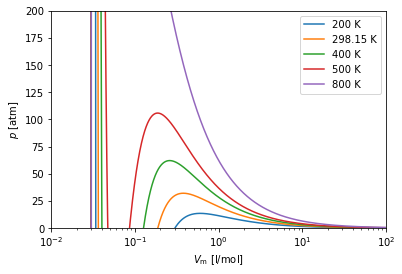

In [37]:
Vm = numpy.linspace(0, 500, 1000000) # volume molaire en l mol-1
plt.xlabel(r"$V_{\mathrm{m}}$ [l/mol]")
plt.xscale("log")
plt.xlim(0.01, 100)
plt.ylabel(r"$p$ [atm]")
plt.ylim(0, 200)
for temperature in temperatures:
    p = gas.pressure(Vm, temperature)
    plt.plot(Vm, p, label=f"{temperature} K")
plt.legend()

## Coefficients de van der Waals et constantes critiques

Les coefficients de van der Waals peuvent être reliées aux constantes critiques:
\begin{align*}
V_{\text{c}} &= 3 b\\
p_{\text{c}} &= \frac{a}{27b^2}\\
T_{\text{c}} &= \frac{8a}{27 Rb} \\
Z_{\text{c}} &= \frac{p_{\text{c}} V_{\text{c}}}{R T_{\text{c}}} = \frac{3}{8}
\end{align*} 

Les valeurs de ces constantes critiques pour le gaz sélectionné ci-dessus valent:

In [38]:
pc, Vc, Tc = gas.criticalValuesFromVDW()
print(f"Pression critique {pc:.3f} atm")
print(f"Volume molaire critique {Vc*1000:.3f} cm^3/mol")
print(f"Temperature critique {Tc:.3f} K")
print(f"Coefficient de compression critique {pc*Vc/(0.08205 * Tc):.3f} ")

Pression critique 217.544 atm
Volume molaire critique 91.500 cm^3/mol
Temperature critique 646.932 K
Coefficient de compression critique 0.375 


Ces valeurs peuvent être comparées aux valeurs expérimentales:

In [39]:
print(f"Pression critique {gas.pc:.3f} atm")
print(f"Volume molaire critique {gas.Vc*1000:.3f} cm^3/mol")
print(f"Temperature critique {gas.Tc:.3f} K")
print(f"Coefficient de compression critique {gas.pc*gas.Vc/(0.08205 * gas.Tc):.3f} ")

Pression critique 218.300 atm
Volume molaire critique 55.300 cm^3/mol
Temperature critique 647.400 K
Coefficient de compression critique 0.227 


## Principe de correspondance des états

L'équation de van der Waals respecte le principe de correspondance des états. Ce principe consiste à rapporter les propriétés (ici $p$, $V_{\text{m}}$ et $T$) par rapport à des valeurs de référence, ici les valeurs au point critique. On introduit alors trois **variables réduites**:
\begin{align*}
p_{\text{r}} &= \frac{p}{p_{\text{c}}}\\
V_{\text{r}} &= \frac{V_{\text{m}}}{V_{\text{c}}}\\
T_{\text{r}} &= \frac{T}{T_{\text{c}}}
\end{align*}

On peut réécrire l'équation de van der Waals en terme de ces variables réduites. On observe alors que cette équation devient indépendante de la nature du gaz:
\begin{align*}
p_{\text{r}} &= \frac{8 T_{\text{r}}}{3 V_{\text{r}} - 1} - \frac{3}{V_{\text{r}}^2}
\end{align*}

Les isothermes tracés à partir de cette équation sont identiques qu'importe le gaz:

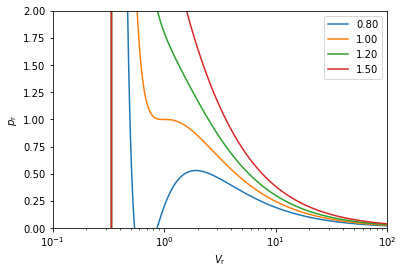

In [40]:
def reducedPressureFromVDW(Vr, Tr):
    part1 = 8 * Tr / (3*Vr - 1)
    part2 = 3 / (Vr * Vr)
    return part1 - part2
Vr = numpy.linspace(0, 100, 10000) # volume réduit
reducedTemperatures = [0.8, 1.0, 1.2, 1.5]
plt.xlabel(r"$V_{\mathrm{r}}$")
plt.xscale("log")
plt.xlim(0.1, 100)
plt.ylabel(r"$p_{\mathrm{r}}$")
plt.ylim(0, 2)
for reducedTemperature in reducedTemperatures:
    pr = reducedPressureFromVDW(Vr, reducedTemperature)
    plt.plot(Vr, pr, label=f"{reducedTemperature:.2f}")
plt.legend()

A partir des données de la littérature (doi: 10.1021/ed063p466), on a les isothermes expérimentaux pour la molécule de CO$_2$ et de butane:

In [41]:
carbondioxide = {}
carbondioxide[273.15] = numpy.array(
    [[22.35, 0.512, 0.481, 0.435, 0.419, 0.0490, 0.0479, 0.0477, 0.0469, 0.0457, 0.0451, 0.0445, 0.0440, 0.0435, 0.0430, 0.0428, 0.0424, 0.0420, 0.0417, 0.0412, 0.0407, 0.0402, 0.0398, 0.0394, 0.0391, 0.0385, 0.0382, 0.0379, 0.0377, 0.0375, 0.0372, 0.0370],
     [1, 31, 33, 34, 34.4, 34.4, 35, 37, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]]) # p = f(Vm)
carbondioxide[283.15] = numpy.array(
    [[0.532, 0.509, 0.488, 0.448, 0.394, 0.330, 0.320, 0.0527, 0.0521, 0.0512, 0.0486, 0.0476, 0.0468, 0.0460, 0.0453, 0.0448, 0.0438, 0.0434, 0.0430, 0.0424, 0.0418, 0.0413, 0.0408, 0.0404, 0.0400, 0.0393, 0.0390, 0.0387, 0.0384, 0.0382, 0.0379, 0.0376], 
    [33, 34, 35, 37, 40, 44, 44.4, 44.4, 45, 50, 75, 100, 125, 150, 175, 200, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]]) # p = f(Vm)
carbondioxide[293.15] = numpy.array(
    [[0.533, 0.493, 0.441, 0.380, 0.366, 0.320, 0.304, 0.269, 0.245, 0.231, 0.224, 0.0583, 0.0580, 0.0566, 0.0536, 0.0511, 0.0498, 0.0486, 0.0476, 0.0468, 0.0462, 0.0456, 0.0451, 0.046, 0.0437, 0.0431, 0.0425, 0.0419, 0.0414, 0.0408, 0.0402, 0.0399, 0.0396, 0.0393, 0.0389, 0.0387, 0.0383],
    [35, 37, 40, 44, 45, 48, 50, 53, 55, 56, 56.5, 56.5, 57, 60, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]])
carbondioxide[303.15] = numpy.array(
    [[0.533, 0.480, 0.407, 0.369, 0.346, 0.314, 0.295, 0.249, 0.204, 0.176, 0.153, 0.143, 0.0710, 0.0692, 0.0652, 0.0632, 0.0621, 0.0570, 0.0536, 0.0516, 0.0502, 0.0492, 0.0484, 0.0477, 0.0469, 0.0464, 0.0453, 0.0444, 0.0437, 0.0430, 0.0425, 0.0420, 0.0412, 0.0408, 0.0404, 0.0401, 0.0397, 0.0394, 0.0391], 
    [37, 40, 45, 48, 50, 53, 55, 60, 65, 68, 70, 71.2, 71.2, 72, 75, 78, 80, 100, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]])
carbondioxide[305.15] = numpy.array(
    [[0.489, 0.415, 0.354, 0.303, 0.258, 0.216, 0.190, 0.172, 0.152, 0.141, 0.110, 0.080, 0.073, 0.069],
    [40, 45, 50, 55, 60, 65, 68, 70, 72, 73, 74, 75, 76, 78]])
carbondioxide[308.15] = numpy.array(
    [[0.498, 0.423, 0.364, 0.354, 0.270, 0.230, 0.217, 0.192, 0.160, 0.152, 0.143, 0.120, 0.0880, 0.0766, 0.0702, 0.0658],
     [40, 45, 50, 55, 60, 65, 68, 70, 74, 75, 76, 78, 80, 82, 85, 90]])
carbondioxide[313.15] = numpy.array(
    [[0.516, 0.441, 0.404, 0.381, 0.350, 0.331, 0.288, 0.250, 0.228, 0.215, 0.183, 0.151, 0.137, 0.114, 0.0847, 0.0739, 0.0690, 0.0636, 0.0599, 0.0562, 0.0538, 0.0522, 0.0510, 0.0499, 0.0491, 0.0483, 0.0470, 0.0460, 0.0451, 0.0442, 0.0436, 0.0431, 0.0421, 0.0417, 0.0413, 0.0409, 0.0405, 0.0401, 0.0398],
    [40, 45, 48, 50, 53, 55, 60, 65, 68, 70, 75, 80, 82, 85, 90, 95, 100, 110, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]])
carbondioxide[323.15] = numpy.array(
    [[0.473, 0.434, 0.412, 0.380, 0.361, 0.319, 0.282, 0.262, 0.250, 0.221, 0.196, 0.171, 0.149, 0.128, 0.110, 0.0847, 0.0706, 0.0624, 0.0584, 0.0559, 0.0539, 0.0524, 0.0514, 0.0504, 0.0488, 0.0476, 0.0465, 0.0456, 0.0448, 0.0442, 0.0431, 0.0426, 0.0422, 0.0418, 0.0413, 0.0409, 0.0405],
    [45, 48, 50, 53, 55, 60, 65, 68, 70, 75, 80, 85, 90, 95, 100, 110, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]])
carbondioxide[333.15] = numpy.array(
    [[0.502, 0.465, 0.439, 0.408, 0.389, 0.346, 0.309, 0.289, 0.277, 0.249, 0.224, 0.202, 0.182, 0.164, 0.148, 0.119, 0.0912, 0.0723, 0.0645, 0.0606, 0.0578, 0.0599, 0.0542, 0.0529, 0.0510, 0.0494, 0.0481, 0.0472, 0.0462, 0.0454, 0.0440, 0.0436, 0.0431, 0.0427, 0.0422, 0.0417, 0.0413],
    [45, 48, 50, 53, 55, 60, 65, 68, 70, 75, 80, 85, 90, 95, 100, 110, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]])
carbondioxide[343.15] = numpy.array(
        [[0.529, 0.490, 0.466, 0.433, 0.414, 0.370, 0.333, 0.313, 0.301, 0.273, 0.249, 0.226, 0.207, 0.190, 0.174, 0.146, 0.115, 0.0857, 0.0732, 0.0665, 0.0624, 0.0596, 0.0574, 0.0558, 0.0532, 0.0513, 0.0498, 0.0486, 0.0476, 0.0467, 0.0452, 0.0446, 0.0440, 0.0436, 0.0431, 0.0421], 
        [45, 48, 50, 53, 55, 60, 65, 68, 70, 75, 80, 85, 90, 95, 100, 110, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 1000]])
carbondioxide[353.15] = numpy.array(
        [[0.491, 0.458, 0.437, 0.392, 0.355, 0.335, 0.322, 0.294, 0.270, 0.248, 0.228, 0.211, 0.195, 0.168, 0.136, 0.101, 0.0832, 0.0738, 0.0677, 0.0638, 0.0611, 0.0588, 0.0557, 0.0534, 0.0516, 0.0503, 0.0491, 0.0480, 0.0464, 0.0457, 0.0451, 0.0445, 0.0440, 0.0434, 0.0429], 
        [50, 53, 55, 60, 65, 68, 70, 75, 80, 85, 90, 95, 100, 110, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]])
carbondioxide[363.15] = numpy.array(
    [[0.516, 0.482, 0.457, 0.415, 0.376, 0.355, 0.343, 0.314, 0.289, 0.266, 0.247, 0.229, 0.213, 0.186, 0.153, 0.116, 0.0946, 0.0817, 0.0741, 0.0687, 0.0651, 0.0624, 0.0583, 0.0556, 0.0535, 0.0518, 0.0505, 0.0494, 0.0476, 0.0468, 0.0461, 0.0454, 0.0449, 0.0443, 0.0438], 
    [50, 53, 55, 60, 65, 68, 70, 75, 80, 85, 90, 95, 100, 110, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]])
carbondioxide[373.15] = numpy.array(
    [[0.539, 0.504, 0.479, 0.436, 0.396, 0.375, 0.362, 0.333, 0.307, 0.285, 0.264, 0.246, 0.230, 0.202, 0.169, 0.131, 0.106, 0.0910, 0.0812, 0.0747, 0.0699, 0.0663, 0.0614, 0.0580, 0.0556, 0.0536, 0.0521, 0.0508, 0.0488, 0.0480, 0.0472, 0.0465, 0.0458, 0.0452, 0.0447],
    [50, 53, 55, 60, 65, 68, 70, 75, 80, 85, 90, 95, 100, 110, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500, 550, 600, 700, 750, 800, 850, 900, 950, 1000]])
butane = {}
butane[425.05] = numpy.array(
    [[0.3183, 0.3026, 0.2869, 0.2791, 0.2712, 0.2634, 0.2555, 0.2476, 0.2437, 0.2398, 0.2320, 0.2241, 0.2162], 
    [37.3340, 37.3770, 37.3985, 37.4025, 37.4035, 37.4055, 37.4055, 37.4035, 37.4055, 37.4085, 37.4150, 37.4235, 37.4460]])
butane[425.10] = numpy.array(
    [[0.3183, 0.3026, 0.2869, 0.2791, 0.2712, 0.2634, 0.2555, 0.2476, 0.2437, 0.2398, 0.2320, 0.2241], 
    [37.3630, 37.4055, 37.4260, 37.4285, 37.4355, 37.4350, 37.4370, 37.4390, 37.4405, 37.4420, 37.4400, 37.4590]])
butane[425.15] = numpy.array(
    [[0.3497, 0.3183, 0.3026, 0.2869, 0.2712, 0.2673, 0.2634, 0.2594, 0.2555, 0.2516, 0.2476, 0.2398, 0.2320, 0.2241,  0.2084], 
    [37.2195, 37.3885, 37.4315, 37.4550, 37.4635, 37.4655, 37.4685, 37.4680, 37.4685, 37.4690, 37.4695, 37.4730, 37.4790, 37.4915, 37.5875]])
butane[425.16] = numpy.array(
    [[0.2869, 0.2791, 0.2712, 0.2673, 0.2634, 0.2594, 0.2555, 0.2516, 0.2476, 0.2437, 0.2398, 0.2320, 0.2241], 
    [37.4595, 37.4670, 37.4715, 37.4730, 37.4740, 37.4735, 37.4740, 37.4745, 37.4765, 37.4785, 37.4800, 37.4860, 37.4980]])
butane[425.17] = numpy.array(
    [[0.2869, 0.2791, 0.2712, 0.2673, 0.2634, 0.2594, 0.2555, 0.2516, 0.2476, 0.2437, 0.2398, 0.2320, 0.2241], 
    [37.4640, 37.4720, 37.4760, 37.4780, 37.4785, 37.4800, 37.4815, 37.4825, 37.4835, 37.4845, 37.4875, 37.4945, 37.5045]])
butane[425.19] = numpy.array(
    [[0.3183, 0.3026, 0.2869, 0.2712, 0.2634, 0.2555, 0.2476, 0.2398, 0.2241], 
    [37.4090, 37.4565, 37.4775, 37.4885, 37.4905, 37.4935, 37.4960, 37.5000, 37.5165]])
butane[425.22] = numpy.array(
    [[0.3183, 0.3026, 0.2869, 0.2712, 0.2634, 0.2555, 0.2476, 0.2398, 0.2241], 
    [37.4255, 37.4690, 37.4965, 37.5085, 37.5110, 37.5125, 37.5170, 37.5220, 37.5415]])
butane[425.25] = numpy.array(
    [[0.3183, 0.3026, 0.2869, 0.2712, 0.2634, 0.2555, 0.2476, 0.2398, 0.2241, 0.2084], 
    [37.4395, 37.4895, 37.5105, 37.5220, 37.5250, 37.5275, 37.5315, 37.5380, 37.5580, 37.7375]])
butane[448.15] = numpy.array(
    [[2.000, 1.000, 0.6670, 0.5000, 0.4000, 0.3330, 0.2860], 
    [15.91, 27.50, 35.68, 41.31, 45.15, 47.89, 50.08]])
butane[498.15] = numpy.array(
    [[2.000, 1.000, 0.6670, 0.5000, 0.4000, 0.3330, 0.2860], 
    [18.30, 32.92, 44.67, 54.29, 62.50, 69.93, 77.21]])
butane[548.15] = numpy.array(
    [[2.000, 1.000, 0.6670, 0.5000, 0.4000, 0.3330, 0.2860], 
    [20.65, 38.18, 53.33, 66.82, 79.34, 91.58, 104.25]])
butane[573.15] = numpy.array(
    [[2.000, 1.000, 0.6670, 0.5000, 0.4000, 0.3330, 0.2860], 
    [21.81, 40.76, 57.58, 72.97, 87.63, 102.28, 117.70]])
experiment = {"CO2": carbondioxide, "C4H10": butane}

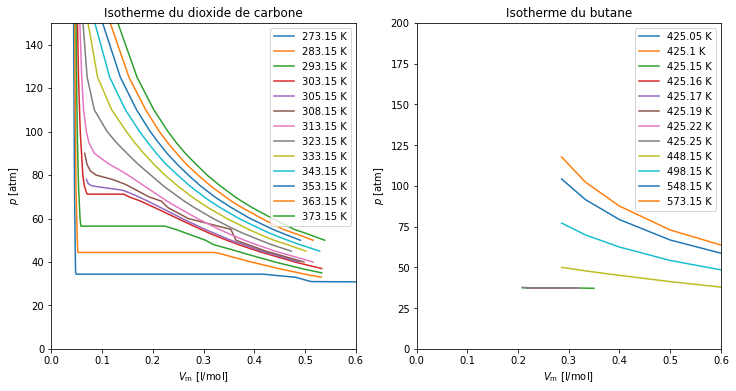

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# CO2
ax[0].set_title("Isotherme du dioxide de carbone")
gas = carbondioxide
ax[0].set_xlabel(r"$V_{\mathrm{m}}$ [l/mol]")
#ax[0].set_xscale("log")
#ax[0].set_xlim(0.02, 10)
ax[0].set_xlim(0.0, 0.6)
ax[0].set_ylabel(r"$p$ [atm]")
ax[0].set_ylim(0, 150)
for (temperature, data) in gas.items():
    Vm = data[0]
    p = data[1]
    ax[0].plot(Vm, p, label=f"{temperature} K")
ax[0].legend()
gas = butane
# Butane
ax[1].set_title("Isotherme du butane")
ax[1].set_xlabel(r"$V_{\mathrm{m}}$ [l/mol]")
#ax[1].set_xscale("log")
#ax[1].set_xlim(0.01, 100)
ax[1].set_xlim(0.0, 0.6)
ax[1].set_ylabel(r"$p$ [atm]")
ax[1].set_ylim(0, 200)
for (temperature, data) in gas.items():
    Vm = data[0]
    p = data[1]
    ax[1].plot(Vm, p, label=f"{temperature} K")
ax[1].legend()

Les deux isothermes peuvent être supperposés sur le même graphique (avec l'équation de van der Waals) en utilisant les variables réduites:

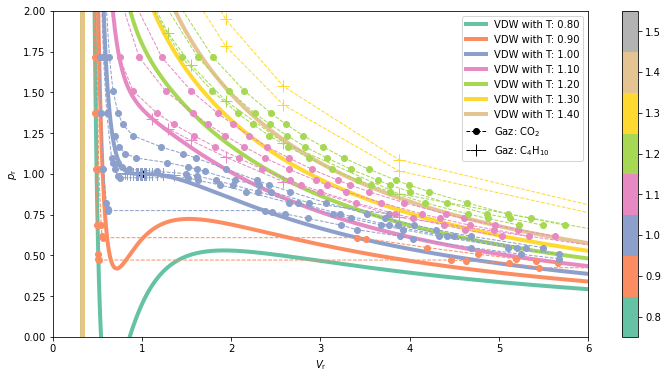

In [43]:
import itertools
def reducedPressureFromVDW(Vr, Tr):
    part1 = 8 * Tr / (3*Vr - 1)
    part2 = 3 / (Vr * Vr)
    return part1 - part2
Vr = numpy.linspace(0, 100, 10000) # volume réduit
reducedTemperatures = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_xlabel(r"$V_{\mathrm{r}}$")
#ax.set_xscale("log")
#ax.set_xlim(0.1, 100)
ax.set_xlim(0, 6)
ax.set_ylabel(r"$p_{\mathrm{r}}$")
ax.set_ylim(0, 2)
# VDW equation curves
#cmap = cm.get_cmap(cm.jet)
#cmap = cm.get_cmap(cm.rainbow)
#cmap = cm.get_cmap(cm.terrain)
#cmap = cm.get_cmap(cm.tab20c)
cmap = cm.get_cmap(cm.Set2)
norm = colors.Normalize(vmin=0.75,vmax=1.55)
markers = itertools.cycle([".", "+", "x", ".", "d"])
for reducedTemperature in reducedTemperatures:
    pr = reducedPressureFromVDW(Vr, reducedTemperature)
    color = cmap(norm(reducedTemperature))
    ax.plot(Vr, pr, label=f"VDW with T: {reducedTemperature:.2f}", color=color, linewidth=4)
# Experimental data
# iterate over the different gas data
for (gas, exp) in experiment.items():
    g = listOfGas[gas]
    pc, Vc, Tc = (g.pc, g.Vc, g.Tc)
    marker = next(markers)
    # dummy plot for the legend
    ax.plot(1, 1, label=f"Gaz: {g.name}", marker=marker, color='k', linewidth=1, markersize=12, linestyle='dashed')
    # iterate over the isotherm for the gas
    for (temperature, data) in exp.items():
        Vm = data[0]
        p = data[1]
        color = cmap(norm(temperature/Tc))
        #ax.scatter(Vm / Vc, p / pc, label=f"Gaz: {gas}, T: {temperature/Tc: .2f}", marker=marker, s=200, color=color)
        ax.plot(Vm / Vc, p / pc, marker=marker, color=color, linewidth=1, markersize=12, linestyle='dashed')
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
ax.legend()

Le principe de correspondance des états peut aussi être utilisé aventageusement pour tracer le facteur de compression $Z$ en fonction de la pression.

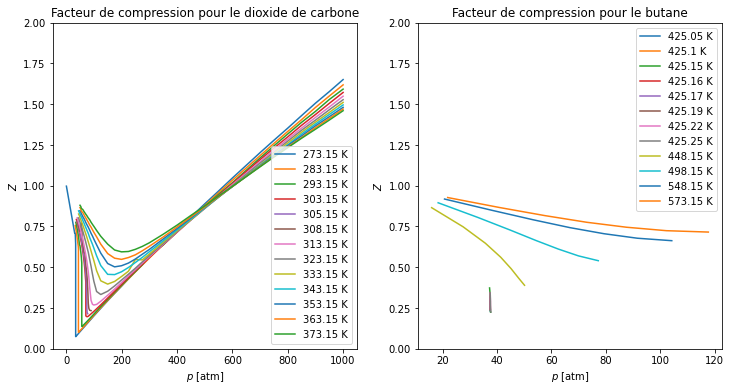

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# CO2
ax[0].set_title("Facteur de compression pour le dioxide de carbone")
gas = carbondioxide
ax[0].set_xlabel(r"$p$ [atm]")
#ax[0].set_xlim(0.0, 0.6)
ax[0].set_ylabel(r"$Z$")
ax[0].set_ylim(0, 2)
for (temperature, data) in gas.items():
    Vm = data[0]
    p = data[1]
    Z = p * Vm / (0.08205 * temperature)
    ax[0].plot(p, Z, label=f"{temperature} K")
ax[0].legend()
gas = butane
# Butane
ax[1].set_title("Facteur de compression pour le butane")
ax[1].set_xlabel(r"$p$ [atm]")
#ax[1].set_xlim(0.0, 0.6)
ax[1].set_ylabel(r"$Z$")
ax[1].set_ylim(0, 2)
for (temperature, data) in gas.items():
    Vm = data[0]
    p = data[1]
    Z = p * Vm / (0.08205 * temperature)
    ax[1].plot(p, Z, label=f"{temperature} K")
ax[1].legend()

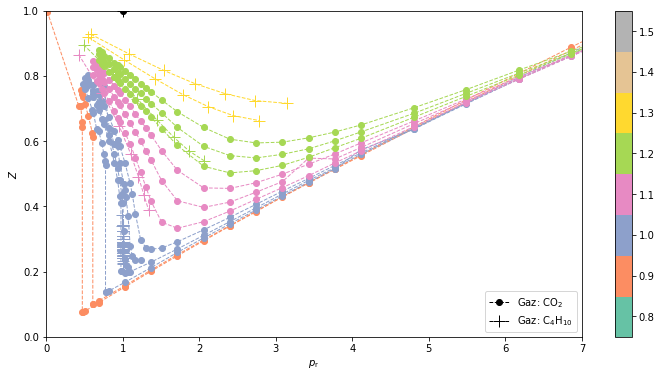

In [45]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_xlabel(r"$p_{\mathrm{r}}$")
ax.set_ylabel(r"$Z$")
ax.set_xlim(0, 7)
ax.set_ylim(0, 1)
cmap = cm.get_cmap(cm.Set2)
norm = colors.Normalize(vmin=0.75,vmax=1.55)
markers = itertools.cycle([".", "+", "x", ".", "d"])
# Experimental data
# iterate over the different gas data
for (gas, exp) in experiment.items():
    g = listOfGas[gas]
    pc, Vc, Tc = (g.pc, g.Vc, g.Tc)
    marker = next(markers)
    # dummy plot for the legend
    ax.plot(1, 1, label=f"Gaz: {g.name}", marker=marker, color='k', linewidth=1, markersize=12, linestyle='dashed')
    # iterate over the isotherm for the gas
    for (temperature, data) in exp.items():
        Vm = data[0]
        p = data[1]
        Z = p * Vm / (0.08205 * temperature)
        color = cmap(norm(temperature/Tc))
        ax.plot(p/pc, Z, marker=marker, color=color, linewidth=1, markersize=12, linestyle='dashed')
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
ax.legend()